In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [6]:
#Perform a weather check on each city using a series of successive API calls.
#And include a print log of each city as it's being processed (with the city number and city name).

#api.openweathermap.org/data/2.5/weather?q=London&appid={API key}

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        Lat = city_weather['coord']['lat']
        Lng = city_weather['coord']['lon']
        Max_Temp = city_weather['main']['temp_max']
        Humidity = city_weather['main']['humidity']
        Cloudiness = city_weather['clouds']['all']
        Wind_Speed = city_weather['wind']['speed']
        Country = city_weather['sys']['country']
        Date = city_weather['dt']
        
        city_data.append({"City":city, "Lat":Lat, "Lng":Lng, "Max Temp":Max_Temp,"Humidity":Humidity,
                          "Cloudiness":Cloudiness, "Wind Speed":Wind_Speed, "Country":Country, "Date":Date} )
       
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | hualmay
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | nome
Processing Record 9 of Set 1 | ust-ilimsk
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | lebrija
Processing Record 16 of Set 1 | moose factory
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | torbay
Processing Record 19 of Set 1 | coquimbo
Processing Record 20 of Set 1 | saskylakh
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | lagoa
Processing Record 23 of 

Processing Record 36 of Set 4 | nouakchott
Processing Record 37 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 38 of Set 4 | temaraia
City not found. Skipping...
Processing Record 39 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 40 of Set 4 | sayyan
Processing Record 41 of Set 4 | port hardy
Processing Record 42 of Set 4 | tazovskiy
Processing Record 43 of Set 4 | bandarbeyla
Processing Record 44 of Set 4 | shangqiu
Processing Record 45 of Set 4 | cidreira
Processing Record 46 of Set 4 | posse
Processing Record 47 of Set 4 | winnemucca
Processing Record 48 of Set 4 | camacha
Processing Record 49 of Set 4 | olinda
Processing Record 0 of Set 5 | caravelas
Processing Record 1 of Set 5 | nanortalik
Processing Record 2 of Set 5 | itaituba
Processing Record 3 of Set 5 | chokurdakh
Processing Record 4 of Set 5 | winneba
Processing Record 5 of Set 5 | san patricio
Processing Record 6 of Set 5 | axim
Processing Record 7 of Set 5 | mehamn
Proces

City not found. Skipping...
Processing Record 27 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 28 of Set 8 | namibe
Processing Record 29 of Set 8 | riyadh
Processing Record 30 of Set 8 | makung
City not found. Skipping...
Processing Record 31 of Set 8 | tukrah
Processing Record 32 of Set 8 | lavumisa
Processing Record 33 of Set 8 | havelock
Processing Record 34 of Set 8 | cabo san lucas
Processing Record 35 of Set 8 | marcona
City not found. Skipping...
Processing Record 36 of Set 8 | dingle
Processing Record 37 of Set 8 | sao joao da barra
Processing Record 38 of Set 8 | acapulco
Processing Record 39 of Set 8 | armeria
Processing Record 40 of Set 8 | pimentel
Processing Record 41 of Set 8 | novoagansk
Processing Record 42 of Set 8 | pearl
Processing Record 43 of Set 8 | atambua
Processing Record 44 of Set 8 | byron bay
Processing Record 45 of Set 8 | huangcun
Processing Record 46 of Set 8 | nhulunbuy
Processing Record 47 of Set 8 | bud
Processing Record 48 of Set 8

Processing Record 12 of Set 12 | gawler
Processing Record 13 of Set 12 | linjiang
Processing Record 14 of Set 12 | gucheng
Processing Record 15 of Set 12 | fuerte olimpo
Processing Record 16 of Set 12 | strezhevoy
Processing Record 17 of Set 12 | uruzgan
Processing Record 18 of Set 12 | bosaso
Processing Record 19 of Set 12 | juneau
Processing Record 20 of Set 12 | badou
Processing Record 21 of Set 12 | siderno
Processing Record 22 of Set 12 | kendari
Processing Record 23 of Set 12 | mpika
Processing Record 24 of Set 12 | varna
Processing Record 25 of Set 12 | lazaro cardenas
Processing Record 26 of Set 12 | lugovoy
Processing Record 27 of Set 12 | inirida
Processing Record 28 of Set 12 | pemangkat
Processing Record 29 of Set 12 | acajutla
Processing Record 30 of Set 12 | srandakan
Processing Record 31 of Set 12 | necochea
Processing Record 32 of Set 12 | pavilosta
Processing Record 33 of Set 12 | flagstaff
Processing Record 34 of Set 12 | kirakira
Processing Record 35 of Set 12 | iqal

In [9]:
city_weather_df = pd.DataFrame(city_data)
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-25.55,85,100,3.18,RU,1611159744
1,bluff,-46.6000,168.3333,53.01,83,74,11.99,NZ,1611159744
2,hualmay,-11.0964,-77.6139,76.10,68,27,11.50,PE,1611159744
3,puerto ayora,-0.7393,-90.3518,82.40,69,20,19.57,EC,1611159744
4,rikitea,-23.1203,-134.9692,78.13,75,37,14.72,PF,1611159744


In [10]:
#Statistical Summary
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02
mean,21.831839,20.129302,49.917083,71.745167,57.397188,8.530211,1.611160e+09
std,32.564744,87.826936,34.185217,20.526865,38.358259,5.902874,5.859900e+01
min,-54.800000,-179.166700,-52.280000,7.000000,0.000000,0.490000,1.611159e+09
25%,-3.299700,-54.237800,28.990000,62.000000,20.000000,4.050000,1.611160e+09
50%,25.700000,24.731400,60.800000,77.000000,75.000000,7.090000,1.611160e+09
75%,49.783400,97.750000,77.950000,86.000000,93.000000,11.500000,1.611160e+09
max,78.218600,179.316700,103.820000,100.000000,100.000000,33.380000,1.611160e+09


In [11]:
#Inspect the dataframe to see if there are any cities with humidity over 100
city_weather_df['Humidity'].value_counts()

83    25
94    25
93    20
80    17
82    16
      ..
36     1
14     1
39     1
9      1
32     1
Name: Humidity, Length: 86, dtype: int64

In [12]:
#Display dataframe to show no cities where humidity is over 100
clean_city_data = city_weather_df.loc[city_weather_df["Humidity"]<=100]
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-25.55,85,100,3.18,RU,1611159744
1,bluff,-46.6000,168.3333,53.01,83,74,11.99,NZ,1611159744
2,hualmay,-11.0964,-77.6139,76.10,68,27,11.50,PE,1611159744
3,puerto ayora,-0.7393,-90.3518,82.40,69,20,19.57,EC,1611159744
4,rikitea,-23.1203,-134.9692,78.13,75,37,14.72,PF,1611159744
...,...,...,...,...,...,...,...,...,...
564,takoradi,4.8845,-1.7554,83.55,71,81,6.76,GH,1611159820
565,basco,20.4487,121.9702,76.32,87,100,26.60,PH,1611159820
566,lashio,22.9333,97.7500,52.74,78,18,2.13,MM,1611159821
567,kirkkonummi,60.1238,24.4385,24.01,98,100,9.73,FI,1611159821


In [15]:
#Export the cleaned data into a csv
clean_city_data.to_csv("output_data/city_weather.csv", header=True)

In [18]:
#Read cities csv
world_weather_df = pd.read_csv("output_data/city_weather.csv")
world_weather_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,tiksi,71.6872,128.8694,-25.55,85,100,3.18,RU,1611159744
1,1,bluff,-46.6000,168.3333,53.01,83,74,11.99,NZ,1611159744
2,2,hualmay,-11.0964,-77.6139,76.10,68,27,11.50,PE,1611159744
3,3,puerto ayora,-0.7393,-90.3518,82.40,69,20,19.57,EC,1611159744
4,4,rikitea,-23.1203,-134.9692,78.13,75,37,14.72,PF,1611159744


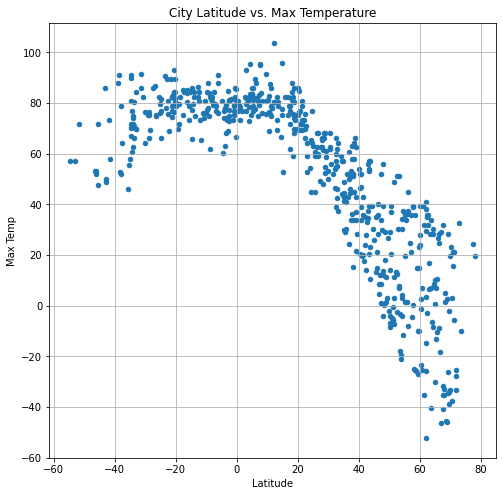

In [21]:
#Latitude vs Temperature Scatter Plot
world_weather_df.plot(kind="scatter", x= "Lat", y="Max Temp", grid=True, figsize=(8,8), title= "City Latitude vs. Max Temperature (1/19/21)")
plt.xlabel("Latitude")
plt.show()

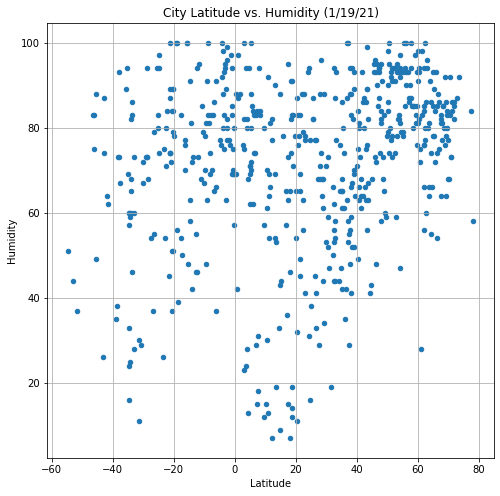

In [22]:
#Latitude vs Humidity
world_weather_df.plot(kind="scatter", x= "Lat", y="Humidity", grid=True, figsize=(8,8), title= "City Latitude vs. Humidity (1/19/21)")
plt.xlabel("Latitude")
plt.show()

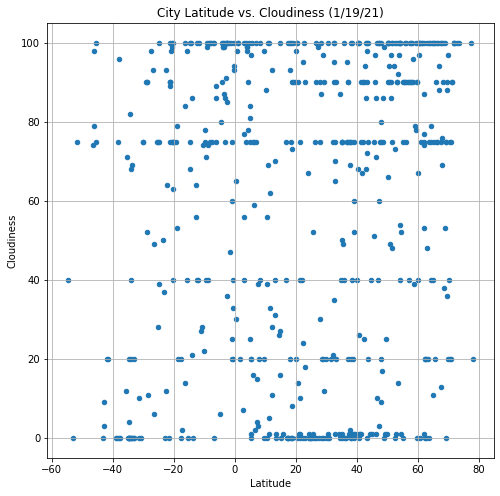

In [23]:
#Latitude vs. Cloudiness
world_weather_df.plot(kind="scatter", x= "Lat", y="Cloudiness", grid=True, figsize=(8,8), title= "City Latitude vs. Cloudiness (1/19/21)")
plt.xlabel("Latitude")
plt.show()

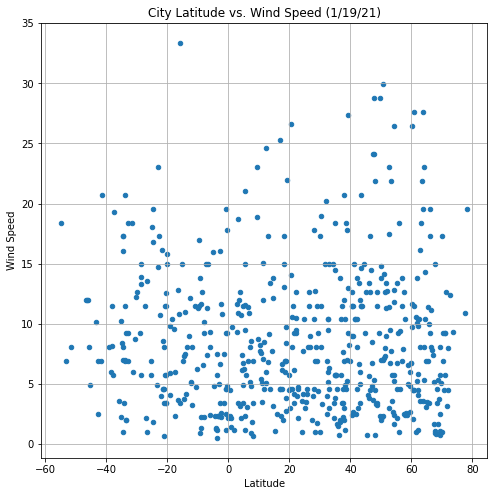

In [24]:
#Latitude vs Wind Speed
world_weather_df.plot(kind="scatter", x= "Lat", y="Wind Speed", grid=True, figsize=(8,8), title= "City Latitude vs. Wind Speed (1/19/21)")
plt.xlabel("Latitude")
plt.show()

In [ ]:
#Northern Hemishpere - Max Temp vs Latitude Linear Regression


In [ ]:
#Southern Hemishpere - Max Temp vs Latitude Linear Regression